### **Trabajo 1**
#### Tecnicas de aprendizaje estadistico
#### **Integrantes**
*   David Andres Cano Gonzalez
*   David Garcia Blandon
*   German Alonso Patino Hurtado
*   Juan Pablo Buitrago Diaz

Librerias:
- **pandas**: Manejo de dataframe.
- **numpy**: Manejo matricial.
- **seaborn**: Realización de gráficos.
- **plotly.express**: Plot mapa interactivo.
- **sklearn.cluster**: Algoritmos de cluster, documentación: https://scikit-learn.org/stable/modules/clustering.html 
- **sklearn.decomposition**: Aplicación de PCA.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
# import plotly.express as px
import sklearn.cluster 
import sklearn.decomposition
import matplotlib.pyplot as plt
# Cantidad de filas y columnas maximas a imprimir
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)
import funciones as fn

C:\Users\usuario\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and i

# Funciones:


## Segmentación, Estandarización, PCA.


In [2]:
def kmeans(datos_:pd.DataFrame,variables_:list ,n_:int,semilla:int  )->list:
    """
    Aplica el algoritmo
    datos: pd.DataFrame.
    variables: list Lista de variables que se incluyen kmeans (deben ser numericas).
    n_: int número de cluster.
    semilla: int semilla de aleatoriedad. 
    return: list de los segmentos, numerico.
    """
    X=datos_[variables_].copy()
    cluster_kmeans= sklearn.cluster.KMeans( n_clusters=n_, random_state=semilla).fit(X)
    segmentos_=cluster_kmeans.labels_

    return segmentos_

def spectral(datos_:pd.DataFrame, variables_:list, n_:int,semilla:int )->list:
    """
    Aplica la función EspectralClustering para la asignación de cluster.
    Aplica el algoritmo
    datos: pd.DataFrame.
    variables: list Lista de variables que se incluyen kmeans (deben ser numericas).
    n_: int número de cluster.
    semilla: int semilla de aleatoriedad. 
    return: list de los segmentos, numerico.  
    """
    X=datos_[variables_].copy()
    cluster_spectral=sklearn.cluster.SpectralClustering(
      n_clusters=n_,
      assign_labels='discretize',
      random_state=semilla).fit(X)
    segmentos_=cluster_spectral.labels_

    return segmentos_

def afinitypropagation(datos_:pd.DataFrame, variables_:list, damp:float(0.5),semilla:int)->np.array:
    """
    Aplica el algoritmo de AffinityPropagation.
    datos: pd.Dataframe
    variables: list lista de string con el nombre de variables usadas en el algoritmo.
    damp: float [0.5,1)
    semilla: int de la asignacion aleatoria. 
    return: np.array labels.
    """
    X=datos_[variables_].copy()
    cluster_afiniti_propagation= sklearn.cluster.AffinityPropagation(damping=damp,random_state=5).fit(X)
    segmentos_=cluster_afiniti_propagation.labels_
    return segmentos_

def estandarizacion(datos_:pd.DataFrame,variables_numeric:list  )->pd.DataFrame:
    """
    Estandariza las variables de un dataframe para que esten entre 0 y 1
    datos: pd.DataFrame.
    variables_numeric: Lista de variables que se quieren estandarizar 
    """
    datos_new=datos_.copy()
    valores_min=datos_new[variables_numeric].min(axis=0)
    valores_max=datos_new[variables_numeric].max(axis=0)
    datos_new[variables_numeric]=(datos_new[variables_numeric]- valores_min)/(valores_max-valores_min )

    return datos_new

def to_dummy(datos_:pd.DataFrame, variables_dumy:list)->pd.DataFrame:
    """
    Transoforma variables categoricas a dummy, solo las variables ingresadas.
    datos_: pd.DataFrame
    varaibles_dumy: list de variables categoricas que se van a crear transformar a dummy
    return: pd.DataFrame con todas las variables de datos y las variables_dumy remplezadas con la trasnformación.
    """
    for var in variables_dumy:
        dummy_temp=pd.get_dummies(datos_[var],prefix=var ).copy()
        columns_temp=dummy_temp.columns
        num_columns=len(columns_temp)
        datos_=pd.concat([datos_.drop(labels=var,axis=1),dummy_temp[columns_temp[0:num_columns-1]  ] ],axis=1)

    return datos_

def datos_to_pca(datos_:pd.DataFrame, variables_:list, prop_var:float)->pd.DataFrame:
    """
    Devuelve el numero de componentes que expliquen un prop_var*100% de variabilidad. 
    datos_: pd.DataFrame (se recomienda que esten estandarizados).
    variables_: list nombre de las variables que se les aplicara el PCA.
    prop_var: float proporción de variabilidad que se quiere explicar.
    return: pd.DataFrame con las componentes que explican al menos un % prop varianzas.
    """
    pca_=sklearn.decomposition.PCA(len(variables_))
    pca_.fit(datos_[variables_])
    varianza_acumulate=pd.Series(pca_.explained_variance_ratio_).cumsum()
    varianza_acumulate.index=varianza_acumulate.index+1
    num_componentes=varianza_acumulate[varianza_acumulate>=prop_var].index[0]
    varianza_acumulate.plot(xlabel='Número de componentes', ylabel='proporción de varibilidad acumulada',grid=True,marker='o')
    print('Las '+str(num_componentes)+' componentes explican un '
    +str(round(varianza_acumulate[num_componentes]*100,2))+
        '% de variabilidad de los datos esta función retorna las '+str(num_componentes)+'componentes')
    pca_final=sklearn.decomposition.PCA(num_componentes)
    pca_final.fit(datos_[variables_])

    return pd.DataFrame(pca_final.fit_transform(datos_[variables_]))



## Tablas comparativas



In [3]:
def numero_comas(numero: float) -> str:
    """
    A un numero entero de varios digitos le asigna un separador cada 3 digitos para ser mas visible
    Args:

    numero: float numero de cualquier cantidad de digitos.

    return: str del numero con las comas cada 3  digitos
    """
    numero_str_ = str(numero).split(".") # separar decimales
    numero_str=numero_str_[0] # extraer int
    dig = int(len(numero_str) / 3) # digitos cada 3
    if dig == len(numero_str) / 3: 
        dig = dig - 1
    for i in range(1, dig + 1):
        numero_str = (
            numero_str[0 : len(numero_str) - 4 * i + 1]
            + "."
            + numero_str[len(numero_str) - 4 * i + 1 :]
        )
    if len(numero_str_)>1:# concat decimales
        numero_str=numero_str+","+numero_str_[1]
    return numero_str


def contar_filas(datos:pd.DataFrame,var_agrupacion:str,value,var_comp:str,nombres_comp:list,na_column,redondeo:int)->list:
    """
    Cuenta el numero de filas junto con una proporción que hay por un valor en especifico de la variable 
    agrupación versus una variable categorica de comparación.
    
    Args: 
    datos: pd.DataFrame.
    var_agrupacion: str una variable categorica de datos de agrupación.
    value: Un valor unico de var_agrupacion.
    var_comp: str una variable categorica de los datos de comparación.
    nombres_comp: list lista de los unicos valores de var_comp.
    na_column: bool True si var_comp tiene valores NA, False sino (para no añadir a la tabla)
    redondeo: int entero para redondear.
    
    return: list con value, frecuencias y proporciones por nombres_comp, totales (NA si lo hay).
    """
    n=datos.shape[0] # total filas
    frecuencia=[] 
    if value=="Total": # sin filtro var_agrupacion
        datos_temp=datos[var_comp].copy()

    elif value=="NA": # poblacion NA
        datos_temp=datos.loc[pd.isna(datos[var_agrupacion]),var_comp].copy()
    else: # var_agrupacion= value
        datos_temp=datos.loc[datos[var_agrupacion]==value,var_comp].copy()        

    for i in nombres_comp: # por cada unico var_comp contar
        frecuencia.append(datos_temp[datos_temp==i].shape[0]) 
    if na_column==True:  # si var_comp tiene NA contarlos
        frecuencia.append(datos_temp[pd.isna(datos_temp)].shape[0])
    frec_total=[]
    total_=sum(frecuencia) # total por fila
    if total_!=0: # si total !=0
        for frec_0 in frecuencia: # por cada nombres_comp
            frec_total.append(numero_comas(frec_0) ) # add frec
            prop=round(frec_0/total_*100,redondeo)
            frec_total.append(numero_comas(prop)+"%" ) # add prop
        pro_total=numero_comas(round(total_/n*100,redondeo))+"%" # total
        frecuencia=[value,*frec_total,numero_comas(total_), pro_total] 
    else: # si total_==0 (NA) no se incluye
        frecuencia=False
    
    return frecuencia


def tabla_caso_categorico(datos:pd.DataFrame, var_agrupacion:str, var_comp:list,redondeo:int,order_var:bool)->pd.DataFrame:
    """
    Tabla pivot var_agrupacion vs var_comp confrecuencia y proporción acumulada horizontal.
    
    Args:
    datos: pd.DataFrame.
    var_agrupacion: str una variable categorica de datos de agrupación.
    var_comp: str una variable categorica de los datos de comparación.
    redondeo: int entero para redondear.
    order_var: bool True ordenar variables por frecuencia, False ordenar por nombre.
    
    return: pd.DataFrame var_agrupacion vs var_comp.
    """
    # orden por frecuencia
    nombres_agrupacion=list(datos[var_agrupacion].value_counts().index)# unicos agrupacion
    nombres_comp=list(datos[var_comp].value_counts().index) # unicos var_comp
    if order_var==False:  # orden por nombres
        nombres_agrupacion.sort(reverse=True)
        nombres_comp.sort(reverse=True)
    columnas=['Variables',var_comp,*list(np.repeat(" ",(len(nombres_comp)+1)*2-1 ))] #columnas
    nas_comp=datos[pd.isna(datos[var_comp])].shape[0] # total NA var_comp
    nombre_comp_prop=[] 
    for nombre in nombres_comp: # nombre (frec) y %
        nombre_comp_prop.append(nombre)
        nombre_comp_prop.append("Prop")
    # vars_comps=[var_agrupacion, *nombre_comp_prop]
    # primera fila 
    fila1=[var_agrupacion, *nombre_comp_prop,"Total","Prop"]
    na_column=False # no hay NA en var_comp 
    if nas_comp>0: # si hay NA entonces
        columnas=[*columnas," "," "] # añadir columnas
        # vars_comps=[*vars_comps,"NA","NA"] 
        # añadir columnas NA
        fila1=[var_agrupacion, *nombre_comp_prop,"NA","Prop","Total","Prop"]
        na_column=True # incluir columnas
    clases_=[*nombres_agrupacion,"NA","Total"] # posibles valores agrupacion
    # vars_comps=[*vars_comps,"Total","Total"]
    data_new=pd.DataFrame(columns=columnas) # creando data.frame
    data_new.loc[len(data_new)]=columnas # añadiendo columna
    data_new.loc[len(data_new)]=fila1 # añadiendo fila
    for value in clases_: # añadiendo frecuencia
        frecuencias=contar_filas(datos,var_agrupacion,value,var_comp,nombres_comp,na_column,redondeo)
        if frecuencias!=False: # si frecuencia no es nula
            data_new.loc[len(data_new)]=frecuencias # añadir 
        
    return data_new

def multi_tablas_categorico(datos:pd.DataFrame,
                            var_agrupacion:str, 
                            variables_comp:list,
                            redondeo:int,
                           order_var:bool):
    """
    Realiza multiples tablas en un pd.DataFrame de la funcion tabla_caso_categorico
    Args:
    datos: pd.DataFrame.
    var_agrupacion: str una variable categorica de datos de agrupación.
    variables_comp: list lista de variables categorica de los datos de comparación.
    redondeo: int entero para redondear.
    order_var: bool True ordenar variables por frecuencia, False ordenar por nombre.
    
    return: pd.DataFrame var_agrupacion vs cada variable de variables_comp.
    """
    num_max_columns=max(list(datos[variables_comp].nunique())) # maximo unicos por var_comp
    columnas_=list(np.repeat("-",num_max_columns*2+5 )) # columnas maximas para el dataframe
    datos_completa=pd.DataFrame(columns=columnas_) # creando dataframe
    for var_comp_ in variables_comp: # tabla_caso_categorico por cada variables_comp
        data_new_=tabla_caso_categorico(datos, var_agrupacion, var_comp_,redondeo,order_var)
        datos_completa.loc[len(datos_completa)]=columnas_ # añade "-" por fila
        for fila in data_new_.index: # añdiendo cada fila al dataframe final 
            filas_=columnas_.copy() 
            fila_new=list(data_new_.iloc[fila])
            filas_[0:len(fila_new)]=fila_new
            datos_completa.loc[len(datos_completa)]=filas_
    
    return datos_completa

def calculo_medidas(datos:pd.DataFrame,var_agrupacion:str ,value,var_comp:str,redondeo:int)->list:
    """
    Por un valor en especifico de var_agrupacion calcula estadisticos de var_comp
    
    Args: 
    datos: pd.DataFrame.
    var_agrupacion: str variable categorica de datos.
    value: un valor unico de var_agrupacion (Total: sin filtros, NA: los NA )
    var_comp: str nombre de una variable númerica.
    redondeo: int decimales que se quiere ver.
    
    return: list con value, frecuencia, quantiles, media, etc.
    """
    if value=="NA": # Para los NA de var_agrupacion 
        datos_temp=datos.loc[pd.isna(datos[var_agrupacion]),:].copy()
    elif value=="Total": # sin filtros
        datos_temp=datos.copy()
    else: # valor especifico de var_agrupacion
        datos_temp=datos.loc[datos[var_agrupacion]==value,:].copy()
    
    frec=datos_temp.shape[0]
    if frec==0:
        medidas_str=False # NA no tiene frecuencia no se incluye
    else:# para el value de var_agrupacion:
        minimo=datos_temp[var_comp].min() #minimo
        Q1=datos_temp[var_comp].quantile(0.25) # cuantiles
        Q2=datos_temp[var_comp].quantile(0.50)
        Q3=datos_temp[var_comp].quantile(0.75)
        ls=(Q3-Q1)*1.5+Q3 # limites para atipicos 
        li=Q1-(Q3-Q1)*1.5 # criterio quantiles
        maximo=datos_temp[var_comp].max() # mas 
        ati_sup=datos_temp[datos_temp[var_comp]>ls].shape[0] # atipicos superior
        ati_inf=datos_temp[datos_temp[var_comp]<li].shape[0] # atipicos inferior
        media=np.round(np.mean(datos_temp[var_comp]),redondeo) # media
        suma=datos_temp[var_comp].sum() # total
        var_=round(float(np.sqrt(datos_temp[var_comp].var()) ),redondeo) # desviacion
        medidas=[frec,minimo,Q1,Q2,Q3,maximo,ati_sup,ati_inf,media,suma,var_] 
        medidas_str=[value]
        for medida_ in medidas: # aplicando separadores de miles.
            medidas_str.append(numero_comas(round(medida_,redondeo) ))
    return medidas_str

def tabla_caso_numerico(datos:pd.DataFrame, var_agrupacion:str, var_comp:list,redondeo:int,order_var:bool)-> pd.DataFrame:
    """
    Por cada valor de var_agrupacion calcula estadísticos de cada variables de var_comp
    
    Args: 
    datos: pd.DataFrame.
    var_agrupacion: str nombre de una variable categorica de datos.
    var_comp: list lista de variables numericas de datos.
    rendondeo: int total decimales por numero.
    order_var: bool True para ordenar var_agrupacion por frecuencia, False por nombre.
    
    return: pd.DataFrame resumen estadístico de cada var_comp discriminada por var_agrupacion.
    """
    nombres_agrupacion=list(datos[var_agrupacion].value_counts().index) # unicos var_agrup
    if order_var==False:  # orden por nombres
        nombres_agrupacion.sort(reverse=True) 
    # Estadisticos de resumen 
    medidas_=[var_agrupacion,'frec',"min",'Q1','Q2','Q3','max','atipico sup','atipico inf','media',"sum",'sd']
    data_new=pd.DataFrame(columns=list(np.repeat(" ",len(medidas_) )) ) # creacion dataframe
    for variables_comp in var_comp: 
        columnas=[' ',variables_comp,*list(np.repeat(" ",len(medidas_)-2 )) ]
        data_new.loc[len(data_new)]=columnas # add nombre variable comp
        data_new.loc[len(data_new)]=[ *medidas_] # add medidas
        for value in [*nombres_agrupacion,"NA","Total"]: # medida por var_agrup
            med=calculo_medidas(datos,var_agrupacion,value,variables_comp,redondeo)
            if med!=False: # add values
                data_new.loc[len(data_new)]=med
        data_new.loc[len(data_new)]=list(np.repeat("----",len(medidas_) )) 
    return data_new



def tabla_dinamica(datos:pd.DataFrame, var_agrupacion:str, var_comp:list, tipo_var:bool,redondeo:int,order_var:bool):
    """
    Aplica multiples tablas de una variable de agrupación versus multiples variables (todas numericas o todas categoricas)
    aplicando las funciones tabla_caso_numerico o  multi_tablas_categorico según el caso
    Args: 
    datos: pd.DataFrame cuales quiera.
    var_agrupacion: str variable de agrupación para el index puede ser númerico o str.
    var_comp: list lista de variables que se quieren comparar (todas numericas o todas categoricas).
    tipo_var: bool True si las variables de var_comp es de tipo númerico, False si las variables son tipo categorico.
    redondeo: int digitos redondeo.
    order_var: True ordenar unicos var_agrupacion (var_comp son categoricas) por frecuencia, False orden alfabetico
    
    return: pd.DataFrame de las funciones  tabla_caso_numerico  o multi_tablas_categorico según sea el caso.
    """
    
    if tipo_var==True: # variables numericas
        data_new=tabla_caso_numerico(datos, var_agrupacion, var_comp,redondeo,order_var)
     
    elif tipo_var==False: # variables categoricas
        data_new=multi_tablas_categorico(datos, var_agrupacion, var_comp,redondeo,order_var)

    else: 
        print("tipo_var debe ser tipo bool.")
        
    return data_new

# The college scorecard (https://collegescorecard.ed.gov/)

Creada por el gobierno de Estados Unidos con el fin de que los usuarios consulten el costo de las universidades.

# Datos (https://data.world/exercises/cluster-analysis-exercise-2)

## CollegeScorecard.csv:

Este contiene información de 7804 escuelas de educación superior con 1725 variables.

## FullDataDocumentation.pdf:

Este documento esta la explicación generica de los datos (algunas variables string se pasaron a int, unas como dummy otras asignando un entero a cada string).

### - Variables importantes:

* ID: Existen varios tipos de identificadores en los datos que son:
  - UNITID, OPEID,  opeid6.
  -	INSTNM: nombre de la institución (y campus).
* Campus: La ubicación de la insitución corresponde a un campus y se tiene:
  - NUMBRANCH: Número de campus que cuenta la universidad.
  - main: 1 si el campus es el principal 0 sino lo es.
* Localización: se tiene la lat y long, ciudad, sta
  - CITY: Ciudad.
  - STABBR: Estado 2 caracteres.
  - ZIP: Código postal.
  - LATITUDE: Latitud.
  - LONGITUDE: Longitud.
* URL: Se tienen las URL de los datos de 2013.
  - INSTURL: Pagina web universidad.
  - NPCURL: URL costos netos de la universidad.
* Titulación: El nivel de titulación clasificado en 5 niveles del 0 al 4 (posgrado), una universidad puede ofrecer varios tipos de titulación y se tienen las siguientes variables: 
  - HIGHDEG: Nivel mas alto que ofrece la universidad.
  - PREDDEG: Nivel mas predominante (mayor proporción en titulación).
* Tipo de universidad:
  - CONTROL: 1: publica, 2: privada sin animo de lucro, 3: privada con animo de lucro.
* Clasificación de minorias: 
  - HBCU: Institución historicamente negros (0,1).
  - PBI: Predominantemente negros (0,1).
  - ANNHI: Instituciones al servicio de los nativos de Alaska y de Hawai (0,1).
  - TRIBAL: Instituciones tribiales (0,1).
  - AANAPII: Instituciones al servicio de los nativos americanos e isleños del Pacífico (0,1).
  - HSI: Instituciones al servicio de los hispanos (0,1).
  - NANTI: Instituciones nativas americanas no tribales (0,1).
* Clasificación relogiosa:
  - RELAFFIL: Enteros representando un tipo de religion, encargado (IPEDS).
* Programas a distancia:
  - DISTANCEONLY: 1 si son universidades que dictan programas solo de manera virtual, existen NA  ya que no cuentan con información antes del 2011 (remplazar NA por 0).
* Costos: Metricas de costos por estudiantes:
  - TUITFTE: Ingresos por matrícula menos los descuentos y bonificaciones, y los dividen por el número de estudiantes (costo de matricula promedio por estudiante).
  - INEXPFTE: Gastos de instrucción divididos por el número de estudiantes a tiempo completo.
  - AVGFACSAL: Salario promedio de los profesores mensual.
* Problemas financieros:
  - HCM: 1 si tiene problemas financieros 0 sino.
* Programas:
  - CIP (190): identifica si la institución ofrece el programa, en qué nivel, y si la institución ofrece el programa y el nivel a través de un programa exclusivamente de educación a distancia. Se calcula a partir de los recuentos de adjudicaciones realizadas en cada CIP, tal y como se informa en IPEDS (el tipo de programa es solo virtual si vale 2, se desconoce el significado de los demás niveles).
  - PCIP (190): proporciona el porcentaje de titulaciones concedidas en cada campo de estudio con código CIP de dos dígitos.
* Admitidos: Se tiene la proporción de admiticos por campus y global.
  - ADM_RATE: Proporción de admitidos en cada campus.
  - ADM_RATE_ALL: Proporción de admitidos global.
* Pruebas de admision: No todas las universidades cuentan con una prueba de admisión existen varias columnas definiendo la frecuencia entre percentiles de algunas areas:
- SAT: Frecuencia de estudiantes que alcanzaron 25 o 75 de puntaje en un area especifica.
* Edades: 
  - UG25abv: proporción de estudiantes con edades entre 25 a 64 años (actualizacion 2013). 

* Estudiantes ayuda federal:
  - PAR_ED_PCT_1STGEN: proporción de estudiantes con ayuda federal que declaren ser de primera generación.
  - PAR_ED_PCT_MS: proporción de estudiantes con ayuda federal que declaren el máximo nivel educativo de sus padres es escuela media.
  - PAR_ED_PCT_HS: proporción de estudiantes con ayuda federal que declaren el máximo nivel educativo de sus padres es secundaria.
  - PAR_ED_PCT_PS: proporción de estudiantes con ayuda federal que declaren el máximo nivel educativo de sus padres es post secundaria.

* Otros:
  - PCTFLOAN: muestra la proporción de estudiantes universitarios que recibieron préstamos federales en un año determinado. 
  - PCTPELL:  muestra la proporción de estudiantes universitarios que recibieron becas Pell en un año determinado.



# Idea inicial 
Para las universidades que tienen información abierta sobre su ubicación, información web, nivel de titulación, tipo de universidad, proporción de porcentajes de titulacion, costos estudiantiles, riesgos financieros, estudiantes que reciben prestamos etc. se desea realizar una segmentación de las universidades para que los usuarios puedan identifcarse con las caracteristicas de los segmentos de las universidades y sea una alternativa para encontrar una universidad.

## Producto esperado

Descripción de los segmentos, analisis gráfico por segmentos, mapa interactivo donde el usuario pueda ver geograficamente las universidades para que tenga acce


In [2]:
# lectura de datos con URL.
datos=pd.read_csv('https://query.data.world/s/zm2i4iby5glnnw4ktejngj775gg7j3')
diccionario = pd.read_csv('https://query.data.world/s/mwzxjzee7zbruhcovlmoq5unjy2xdq')
# datos=pd.read_csv('CollegeScorecard.csv',sep=',')

C:\Users\usuario\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (7,9,1427,1542,1561,1575) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
variables_cip=[]
variables_cet_degre=[]
variables_assoc=[]
variables_bac=[]
variables_grad=[]
['CERT1', 'CERT2', 'ASSOC', 'CERT4', 'BACHL']
for i in datos.columns:
    if 'CIP' == i[0:3]:
        variables_cip.append(i)
        if ('CERT1' in i) or ('CERT2' in i):
            variables_cet_degre.append(i)
        elif 'ASSOC' in i:
            variables_assoc.append(i)
        elif 'BACHL' in i:
            variables_bac.append(i)
        elif 'CERT4' in i:
            variables_grad.append(i)
print(len(variables_cip))

190


In [4]:
variables_id= ['UNITID', 'OPEID', 'opeid6','INSTNM', # id 
          'main', # num campus and campus 
           'CITY',  'STABBR',  'ZIP','st_fips','RELAFFIL',
          'LATITUDE','LONGITUDE', # localizacion
          'INSTURL', 'NPCURL'] # URL´s
variables_dum=['CONTROL', # privado publico 
          #  'HBCU', 'PBI', 'ANNHI', 'TRIBAL', 'AANAPII', 'HSI', 'NANTI', # minorias
          # *variables_CIP, # programas 
          'HIGHDEG', 'PREDDEG', # nivel formación
          'DISTANCEONLY', # solo programas a distancia
            'HCM2', # riesgo financiero
]
variables_num=[ #  *variables_PCIP, # proporcion titulación
               # 'NUMBRANCH',
               'TUITFTE', 'INEXPFTE',# 'AVGFACSAL', # financiacion monetaria promedio
              #  'PAR_ED_PCT_1STGEN','PAR_ED_PCT_MS','PAR_ED_PCT_HS','PAR_ED_PCT_PS', # prop ayuda federal
                         # 'PCTFLOAN', 'PCTPELL' # estudiantes reciben beneficios 
]
#*variables_id,
variables=[*variables_dum,*variables_num ]

<AxesSubplot:>

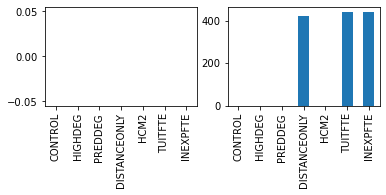

In [5]:
plt.figure(2)
plt.subplot(222)
datos[variables].isna().sum().plot.bar()
plt.subplot(221)
privado=(datos[variables]=='PrivacySuppressed').sum()
privado.plot.bar()

- Distribución de NA´s en las variables seleccionadas.

In [6]:
na_cip=datos[variables_cip].isna().any(axis=1)#.sum()
privacidad_cip=(datos[variables_cip]=='PrivacySuppressed').any(axis=1)#.sum()
print('NA CIP:', na_cip.sum(),'Privacidad CIP:', 
      privacidad_cip.sum(),'Comunes:' ,(na_cip | privacidad_cip).sum()  )

NA CIP: 421 Privacidad CIP: 0 Comunes: 421


- variables_id: identificar a las universidades como ubicación, nombre, código id, pagina wen.
- variables_dum: Las identificamos como variables categoricas y en su mayoria tienen 2 niveles y no es necesario crear una dummy pues ya estan definias 0,1. Las variables CONTROL, HIGHDEG, PREDDEG se debe crear una dummy para cada una.
- variables_num: 5 variables, una de conteo, 2 de promedio y 2 de proporción.

Estandarizar (X-X_min)/(X_max-X_min) las numericas para una escata de 0 a 1 igual que las dummy.



In [7]:
(datos=='PrivacySuppressed').any(axis=1).sum()

7639

- Celdas con 'PrivacySuppressed' hay datos que las universidades tienen como privado (los consideramos NA´s) , hay 7639 filas que tienen al menos una columna con información privada.
- Pero con las variables num y dum seleccionadas no se tiene ese problema.

# Datos creados:

- **datos**: Es el dataframe completo sin filtros.
- **datos_resultado**: Es el datafrrame con las variables id y las variables (numericas y dummy seleccionadas) sin registro de NA en las dummy y numerica y es el dataframe que se le añade la columna de cluster.
- **datos_estandar**: Es el datos_resultado con las variables numericas y dummy pero estandarizando las numericas de 0 a 1 y las categoricas a dummmy.
- **datos_pca**: Son los datos que se le aplicaron PCA a datos_estandar.


La idea es solo tener estos dataframe no es necesario crear mas.


In [7]:
datos_resultado=datos.loc[(~datos[[*variables_cip,*variables]].isna().any(axis=1)) & ((datos[['HIGHDEG', 'PREDDEG']]!=0).any(axis=1))
                          ,[*variables_id,*variables,*variables_cip] ].reset_index().drop(labels='index',axis=1)
print('De las ' ,datos.shape[0],' universidades se trabajara solo con ' ,
      datos_resultado.shape[0],' un ' ,round(datos_resultado.shape[0]/datos.shape[0]*100,2),
      '% de las univerisadad' )
datos_resultado['NUM_PROGRAM']=(datos_resultado[variables_cip]>0).sum(axis=1)
# datos_resultado['NUM_CERTDEGRE']=(datos_resultado[variables_cet_degre]>0).sum(axis=1)
# datos_resultado['NUM_ASSOC']=(datos_resultado[variables_assoc]>0).sum(axis=1)
# datos_resultado['NUM_BACHL']=(datos_resultado[variables_bac]>0).sum(axis=1)
# datos_resultado['NUM_GRADUATE']=(datos_resultado[variables_grad]>0).sum(axis=1)
variables=[*variables,'NUM_PROGRAM']
variables_num=[*variables_num,'NUM_PROGRAM']

De las  7804  universidades se trabajara solo con  7279  un  93.27 % de las univerisadad


## Anilisis descriptivo

C:\Users\usuario\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The handle <matplotlib.patches.Patch object at 0x000002589D5F8B00> has a label of '_nolegend_' which cannot be automatically added to the legend.
  **kwargs)


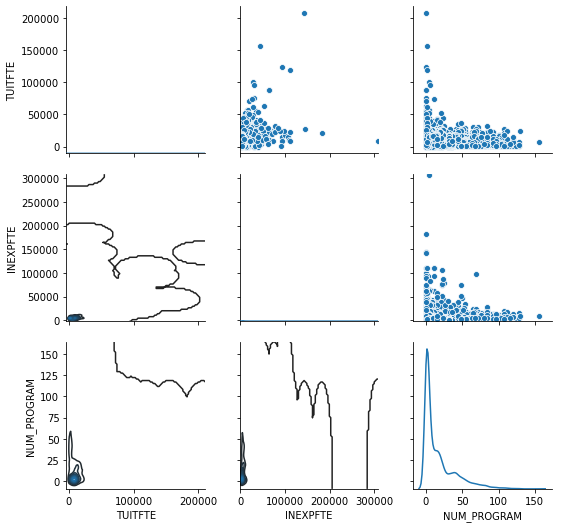

In [9]:
grafico_comparativo_num = sns.PairGrid(datos_resultado,vars =variables_num )#,diag_sharey=False,diag_sharex=False)
grafico_comparativo_num.map_diag(sns.kdeplot)#,kde=True,facet_kws=dict(sharey=False) )
grafico_comparativo_num.map_upper(sns.scatterplot)#,facet_kws=dict(sharey=False))
grafico_comparativo_num.map_lower(sns.kdeplot)#,facet_kws=dict(sharey=False))
grafico_comparativo_num.add_legend()

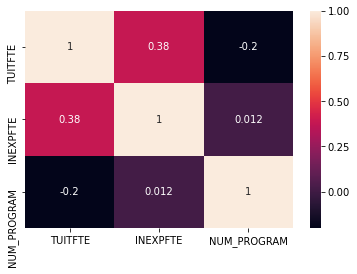

In [10]:
sns.heatmap(datos_resultado[variables_num].corr(), annot=True)
plt.show()

Las variables NUM_CERTDEGRE  y NUM_ASSOC estan alta mente correlacionadas llegando a un 0.72, y existen mas variables con correlación cerca de 0.35 esto sin tener en cuenta las variables cualitativas, por ende es recomendable realizar componentes principales.

# Segmentación

## Estandarización y creación de dummy.
- Para las variables numericas se estandariza para que se encuentren entre 0 y 1.
- Aunque las variables categoricas la mayoria ya tienen una estructura 0,1  hay 3 variables que son numericas pero con mas de 2 niveles.

- Los datos_estandar se encuentran estandarizados para aplicar una segmentación para todos.

In [8]:
datos_estandar=fn.estandarizacion(datos_resultado[variables],variables_num)
datos_estandar=fn.to_dummy(datos_estandar,['CONTROL', 'HIGHDEG', 'PREDDEG' ])
datos_estandar.describe()

,DISTANCEONLY,HCM2,TUITFTE,INEXPFTE,NUM_PROGRAM,CONTROL_1,CONTROL_2,HIGHDEG_1,HIGHDEG_2,HIGHDEG_3,PREDDEG_1,PREDDEG_2,PREDDEG_3
count,7279.000000,7279.000000,7279.000000,7279.000000,7279.000000,7279.000000,7279.000000,7279.000000,7279.000000,7279.000000,7279.000000,7279.000000,7279.000000
mean,0.005083,0.008792,0.048038,0.022519,0.114539,0.273664,0.257178,0.355681,0.238769,0.123094,0.456244,0.210606,0.293035
std,0.071119,0.093361,0.040424,0.028550,0.144266,0.445869,0.437108,0.478752,0.426361,0.328567,0.498116,0.407767,0.455186
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.021005,0.010730,0.012903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.042213,0.016933,0.051613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.064931,0.025550,0.161290,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\usuario\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\usuario\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Users\usuario\Anaconda3\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:516: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
C:\Users\usuario\Anaconda3\lib\site-packages\matplotlib\contour.py:1486: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\usuario\Anaconda3\lib\site-packages\matplotlib\contour.py:1487: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\usuario\Anaconda3\lib\site-package

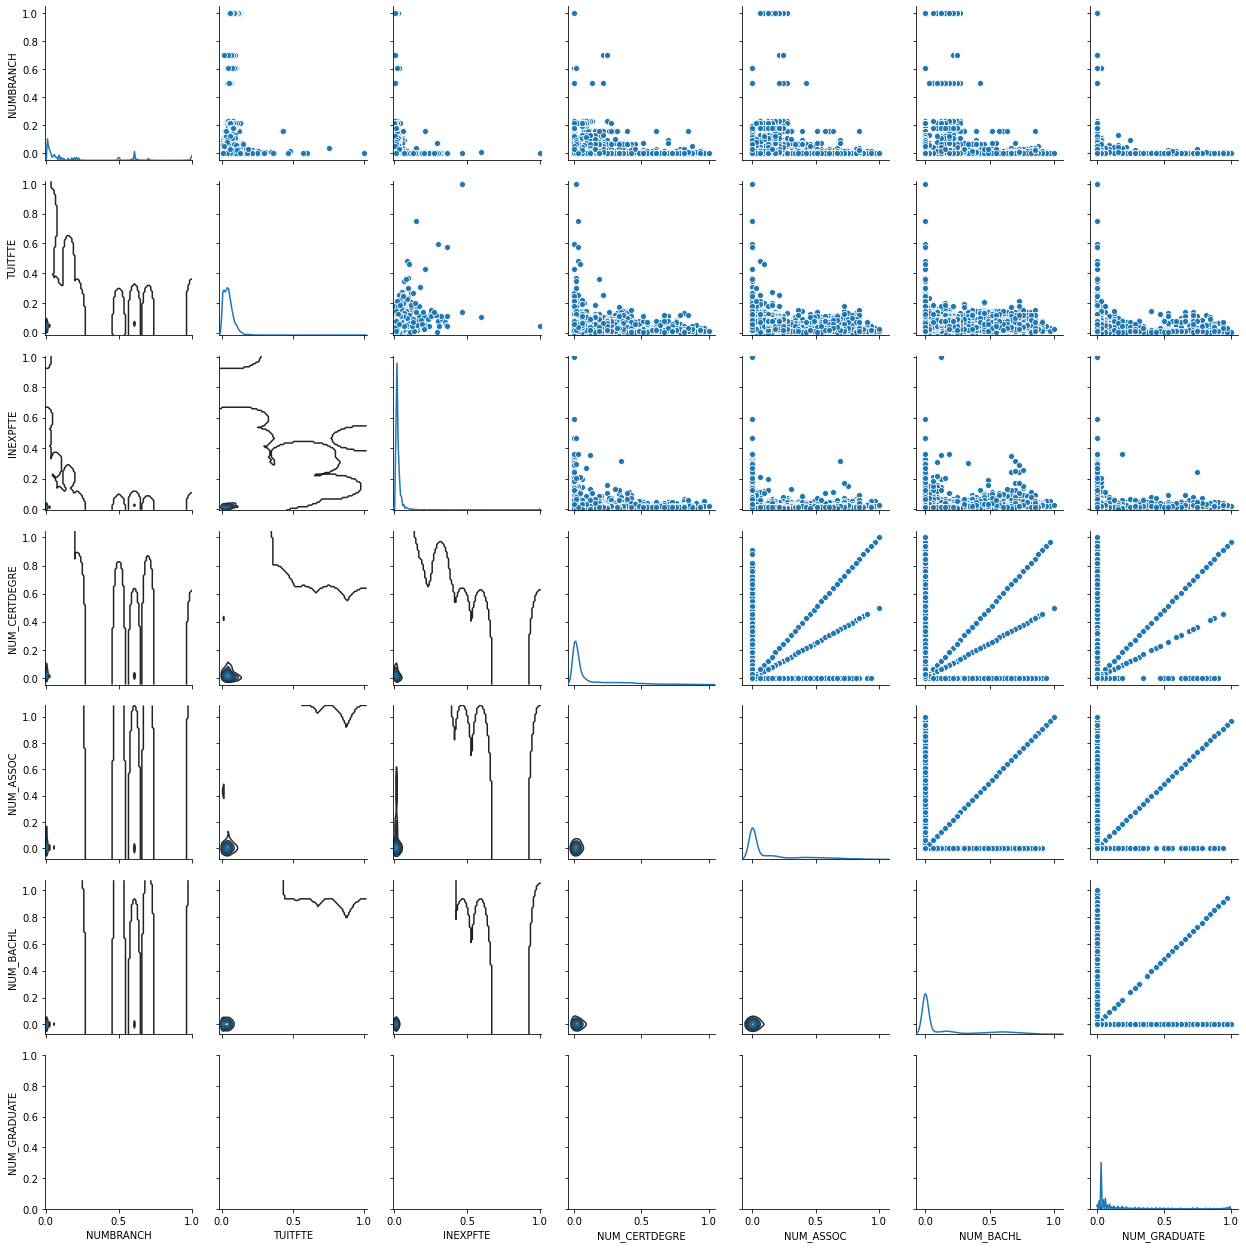

In [20]:
grafico_comparativo_num = sns.PairGrid(datos_estandar,vars =variables_num )
grafico_comparativo_num.map_diag(sns.kdeplot)
grafico_comparativo_num.map_upper(sns.scatterplot)
grafico_comparativo_num.map_lower(sns.kdeplot)

##  Aplicación de PCA


Las 4 componentes explican un 87.15% de variabilidad de los datos esta función retorna las 4componentes


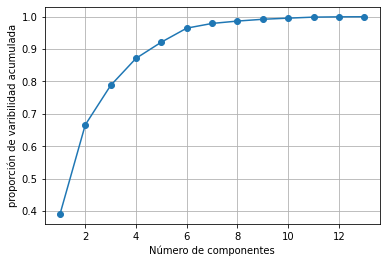

In [9]:
datos_pca=fn.datos_to_pca(datos_estandar,list(datos_estandar), 0.8)

- En este gráfico vemos que las 2 primeras componentes explican casi un 60% de variabilidad de las variables seleccionadas, 4 vairables explican casi un 80% de variabilidad de los datos. 

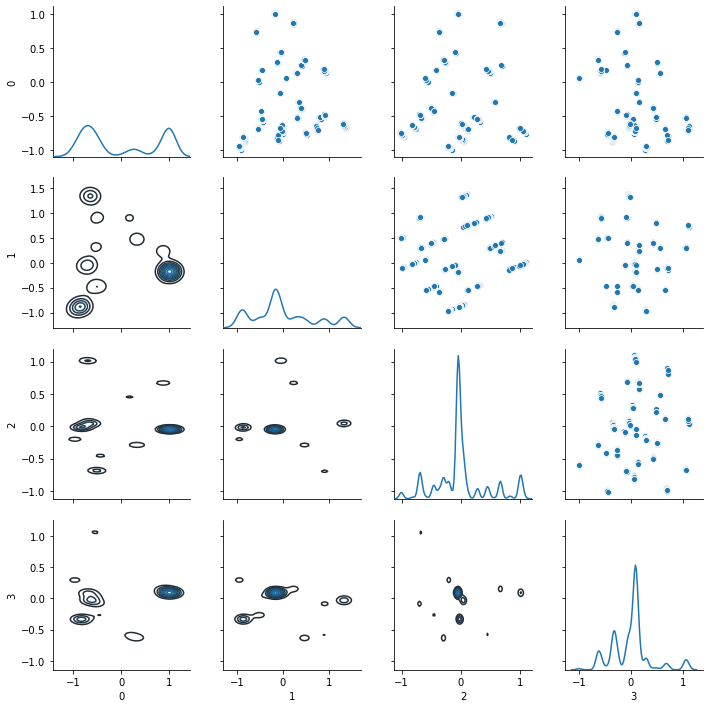

In [13]:
grafico_comparativo_num = sns.PairGrid(datos_pca )
grafico_comparativo_num.map_diag(sns.kdeplot)
grafico_comparativo_num.map_upper(sns.scatterplot)
grafico_comparativo_num.map_lower(sns.kdeplot)

  0%|          | 0/8 [00:00<?, ?it/s]C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\usuario\Anacon

AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

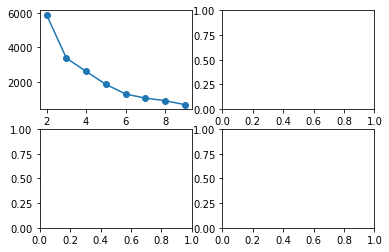

In [14]:
# Historia=[]
sse=[]
score_kmeans=[]
score_spectral=[]
score_bir=[]
from tqdm import tqdm
num_cluster=10
for i in tqdm(range(2,num_cluster)):
    # k means
    Historia=sklearn.cluster.KMeans(n_clusters=i, random_state=42).fit(datos_pca)
    sse.append(Historia.inertia_) # sse kmeans
    score = sklearn.metrics.silhouette_score(datos_pca, Historia.labels_)
    score_kmeans.append(score)
    labels_temp=fn.spectral(datos_pca,list(datos_pca),i, 123 )
    score_spectral.append(sklearn.metrics.silhouette_score(datos_pca, labels_temp))
    bir_=sklearn.cluster.Birch(n_clusters=i).fit(datos_pca)
    labels_temp=bir_.labels_
    score_bir.append(sklearn.metrics.silhouette_score(datos_pca, labels_temp))    



[Text(0.5, 0, 'Number of Clusters'), Text(0, 0.5, 'Score Birch')]

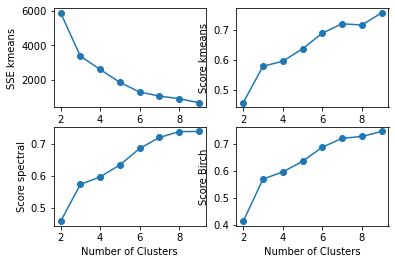

In [26]:
fig, axs = plt.subplots(2, 2)
axs[0,0].plot(range(2,num_cluster ), sse,marker='o')
axs[0,0].set(xlabel="Number of Clusters",ylabel="SSE kmeans")
axs[0,1].plot(range(2, num_cluster), score_kmeans,marker='o')
axs[0,1].set(xlabel="Number of Clusters",ylabel="Score kmeans")
axs[1,0].plot(range(2, num_cluster), score_spectral,marker='o')
axs[1,0].set(xlabel="Number of Clusters",ylabel="Score spectral")
axs[1,1].plot(range(2, num_cluster), score_bir,marker='o')
axs[1,1].set(xlabel="Number of Clusters",ylabel="Score Birch")

Un número minimo de cluster apropiados para las universidades podria ser 4 ua que este presenta un sse pequeño y un socre serca del 0.6 lo que es alto y a medida que se añade mas numero de cluster este factor no presenta un cambio tan significativo.

In [10]:
cluster_0=fn.kmeans(datos_pca,list(datos_pca)[0:4], 4, 133 )
datos_pca['CLUSTER']=cluster_0
datos_pca['CLUSTER']='Cluster_'+datos_pca['CLUSTER'].astype(str)
datos_resultado['CLUSTER']=datos_pca['CLUSTER']

C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\usuario\Anaconda3\lib\site-packages\sklearn\metrics

<AxesSubplot:xlabel='0', ylabel='1'>

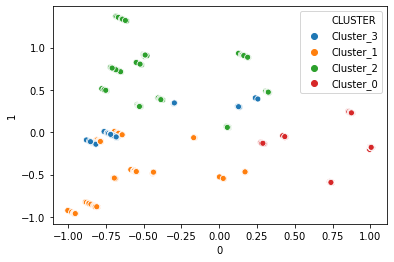

In [11]:
sns.scatterplot(x=0,y=1,data=datos_pca,hue='CLUSTER')

En este gráfico se observa en los graficos de dispersión una agrupación no muy clara y en los de densidad entre 2 variables nos muestra una posible agrupación mas clara, donde un grupo en especifico esta muy concentrado lo que sugiere un grupo de universidades que es muy frecuente.

## Tablas comparativas 

- En esta sección se realizara la descripción de los cluster creados para darle atributos y definir si tienen sentido o no.

- Los gráficos sera después de esto.

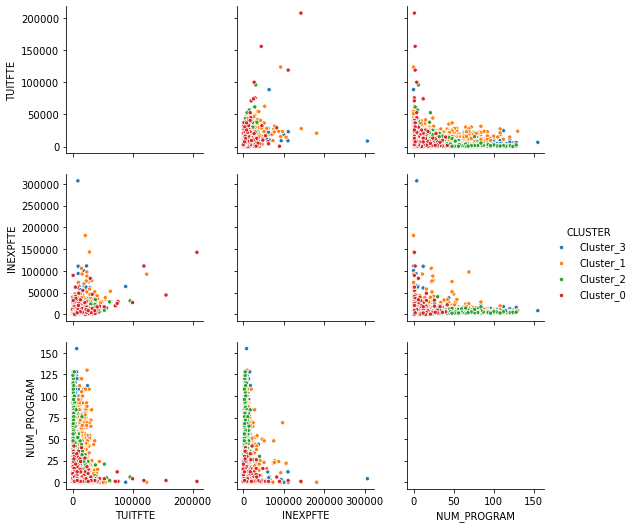

In [93]:
# datos_resultado['CLUSTER']= cluster_0
grafico_comparativo_num = sns.PairGrid(datos_resultado,vars =variables_num,hue='CLUSTER' )#,diag_sharey=False,diag_sharex=False)
# grafico_comparativo_num.map_diag(sns.kdeplot)#,kde=True,facet_kws=dict(sharey=False) )
grafico_comparativo_num.map_upper(sns.scatterplot,size=0.3)#,facet_kws=dict(sharey=False))
grafico_comparativo_num.map_lower(sns.scatterplot,size=0.3)#,facet_kws=dict(sharey=False))
grafico_comparativo_num.add_legend()

In [12]:
# Tablas comparativas para las vairables numericas seleccionadas
# datos_resultado['CLUSTER']= cluster_0
fn.tabla_dinamica(datos_resultado,'CLUSTER',variables_num,True , 2, False)

,,,,,,,,,,,,
0,,TUITFTE,,,,,,,,,,
1,CLUSTER,frec,min,Q1,Q2,Q3,max,atipico sup,atipico inf,media,sum,sd
2,Cluster_3,610,"527,0","5.011,75","6.551,5","9.273,0","88.466,0",28,0,"7.769,96","4.739.675,0","6.211,54"
3,Cluster_2,2.097,"0,0","1.948,0","5.171,0","12.239,0","95.815,0",17,0,"7.913,25","16.594.082,0","7.566,54"
4,Cluster_1,1.937,"0,0","10.047,0","13.956,0","18.300,0","123.492,0",66,0,"15.075,69","29.201.612,0","8.070,64"
5,Cluster_0,2.635,"0,0","4.498,0","7.631,0","10.476,5","207.213,0",102,0,"8.319,25","21.921.215,0","8.070,16"
6,Total,7.279,"0,0","4.352,5","8.747,0","13.454,5","207.213,0",197,0,"9.954,19","72.456.584,0","8.376,3"
7,----,----,----,----,----,----,----,----,----,----,----,----
8,,INEXPFTE,,,,,,,,,,
9,CLUSTER,frec,min,Q1,Q2,Q3,max,atipico sup,atipico inf,media,sum,sd


In [13]:
# Tablas comparativas para las vairables categoricas seleccionadas
# datos_resultado['CLUSTER']= cluster_0
fn.tabla_dinamica(datos_resultado,'CLUSTER',variables_dum,False , 2, False)

,-,-,-,-,-,-,-,-,-,-,-,-,-
0,-,-,-,-,-,-,-,-,-,-,-,-,-
1,Variables,CONTROL,,,,,,,,-,-,-,-
2,CLUSTER,3,Prop,2,Prop,1,Prop,Total,Prop,-,-,-,-
3,Cluster_3,0,"0,0%",0,"0,0%",610,"100,0%",610,"8,38%",-,-,-,-
4,Cluster_2,957,"45,64%",104,"4,96%",1.036,"49,4%",2.097,"28,81%",-,-,-,-
5,Cluster_1,329,"16,99%",1.608,"83,01%",0,"0,0%",1.937,"26,61%",-,-,-,-
6,Cluster_0,2.129,"80,8%",160,"6,07%",346,"13,13%",2.635,"36,2%",-,-,-,-
7,Total,3.415,"46,92%",1.872,"25,72%",1.992,"27,37%",7.279,"100,0%",-,-,-,-
8,-,-,-,-,-,-,-,-,-,-,-,-,-
9,Variables,HIGHDEG,,,,,,,,,,-,-


cluster 3\
600 universidades 
Universidades con un costo por matricula de 6500 dolares
con una inversión por estudiante de 8 mil dolares
27 programas por universidad (mayor programa) en promedio
donde todas las universidad son publicas. donde el los programas con mayor nivel academico son Graduate degree, pero predomina Bachelor´s degree.

Cluster 2\
2097 universidades 
Universidades con un costo por matricula de 5000 dolares
con una inversión por estudiante de 4.6 mil dolares
20 programas por universidad en promedio
donde todas las universidad se concentran entre publicas y privadas con animo de lucro donde en los programas con mayor nivel academico y que mas predomina es Associate degree.

Cluster 1\ 
1.937 universidades 
Universidades con un costo por matricula de 14mil dolares
con una inversión por estudiante de 7.3 mil dolares
15 programas por universidad en promedio
donde la mayoria de universidades son privadas sin animo de lucro. donde el los programas con mayor nivel academico son Graduate degree, pero predomina Bachelor´s degree.

cluster 0\ 
Universidades con un costo por matricula de 7.6mil dolares
con una inversión por estudiante de 3.9 mil dolares
2 programas por universidad en promedio
donde la mayoria de universidades son privadas con animo de lucro. donde el los programas con mayor nivel academico y pedominan son Certificate degree, pero predomina Bachelor´s degree.


In [184]:
diccionario.iloc[519:521]
# diccionario[diccionario['VARIABLE NAME']=='DISTANCEONLY']#.iloc[27:85].LABEL

,NAME OF DATA ELEMENT,Year,dev-category,developer-friendly name,VARIABLE NAME,API data type,label,VALUE,LABEL,SCORECARD? Y/N,SOURCE,NOTES
519,Flag for distance-education-only education,2013,school,online_only,DISTANCEONLY,integer,NaN,0,Not distance-education only,Y,IPEDS,NaN
520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Distance-education only,NaN,NaN,NaN


In [120]:
diccionario.iloc[27:85].VALUE

27     1
28     2
29     4
30     5
31     6
32     8
33     9
34    10
35    11
36    12
37    13
38    15
39    16
40    17
41    18
42    19
43    20
44    21
45    22
46    23
47    24
48    25
49    26
50    27
51    28
52    29
53    30
54    31
55    32
56    33
57    34
58    35
59    36
60    37
61    38
62    39
63    40
64    41
65    42
66    44
67    45
68    46
69    47
70    48
71    49
72    50
73    51
74    53
75    54
76    55
77    56
78    60
79    64
80    66
81    69
82    70
83    72
84    78
Name: VALUE, dtype: object

In [14]:
# titulacion=['Certificate degree', 'Associate degree', 'Bachelor´s degree', 'Graduate degree']
datos_resultado[['st_fips'] ]=datos_resultado[['st_fips'] ].replace(list(diccionario.iloc[27:85].VALUE.astype(int)), 
                                                                    list(diccionario.iloc[27:85].LABEL) )
datos_resultado[['CONTROL']]=datos_resultado[['CONTROL']].replace(list(diccionario.iloc[24:27].VALUE.astype(int)), 
                                                                  list(diccionario.iloc[24:27].LABEL))
datos_resultado[['PREDDEG']]=datos_resultado[['PREDDEG']].replace(list(diccionario.iloc[15:19].VALUE.astype(int)), 
                                                                  list(diccionario.iloc[15:19].LABEL))
datos_resultado[['HIGHDEG']]=datos_resultado[['HIGHDEG']].replace(list(diccionario.iloc[20:24].VALUE.astype(int)), 
                                                                  list(diccionario.iloc[20:24].LABEL))
datos_resultado[['RELAFFIL']]=datos_resultado[['RELAFFIL']].replace(list(diccionario.iloc[201:266].VALUE.astype(int)), 
                                                                  list(diccionario.iloc[201:266].LABEL))
datos_resultado[['DISTANCEONLY']]=datos_resultado[['DISTANCEONLY']].replace(list(diccionario.iloc[519:521].VALUE.astype(int)), 
                                                                  list(diccionario.iloc[519:521].LABEL))

In [15]:
filtro=~('www'==datos_resultado['INSTURL'].apply(lambda x: str(x)[0:3]) )
datos_resultado.loc[filtro,'INSTURL' ]='www.'+datos_resultado.loc[filtro,'INSTURL' ]
datos_resultado['INSTURL']=("<li class='dropdown'>  <a href='https://"+datos_resultado['INSTURL']+
                            "' target='_blank'>Main web page </a> </li>")

In [16]:
datos_resultado['RELAFFIL']=datos_resultado['RELAFFIL'].fillna('')
filtro=datos_resultado['RELAFFIL']!=''
datos_resultado.loc[filtro,'RELAFFIL']="<li class='dropdown'> Religion: "+datos_resultado.loc[filtro,'RELAFFIL'] +'</li>'

In [19]:
datos_resultado=datos_resultado.drop(labels=variables_cip, axis=1)

In [20]:
datos_resultado.columns

Index(['UNITID', 'OPEID', 'opeid6', 'INSTNM', 'main', 'CITY', 'STABBR', 'ZIP',
       'st_fips', 'RELAFFIL', 'LATITUDE', 'LONGITUDE', 'INSTURL', 'NPCURL',
       'CONTROL', 'HIGHDEG', 'PREDDEG', 'DISTANCEONLY', 'HCM2', 'TUITFTE',
       'INEXPFTE', 'NUM_PROGRAM', 'CLUSTER'],
      dtype='object')

In [21]:
datos_resultado.to_csv('CollegeScorecard_result.csv')